In [ ]:
# Mixed Martial Arts (MMA) is a full-contact combat sport that combines techniques from various martial arts, including boxing, wrestling, Brazilian jiu-jitsu, Muay Thai, and judo. It emphasizes both striking and grappling, allowing athletes to compete in a wide range of fighting styles. Known for its intensity and versatility, MMA has grown into one of the fastest-rising sports worldwide, showcased prominently in organizations like the UFC.
# Research question
# What are the key factors that influence the outcomes of MMA fights?


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# data taken from https://www.kaggle.com/code/rishpande/ufc-data-analysis-visualization-beginner
df = pd.read_csv("data.csv")

In [2]:
# round 1 data for both fighters
exp_var = expl_var = [
    # -------------------------------
    # Fighter Demographics
    # -------------------------------
    "BPrev",        # Previous fights by 'Blue' fighter
    "B_Age",        # Age of 'Blue' fighter
    "B_Height",     # Height of 'Blue' fighter
    "B_Weight",     # Weight of 'Blue' fighter
    "B_Location",   # Location of 'Blue' fighter
    "B_HomeTown",   # Hometown of 'Blue' fighter
    "RPrev",        # Previous fights by 'Red' fighter
    "R_Age",        # Age of 'Red' fighter
    "R_Height",     # Height of 'Red' fighter
    "R_Weight",     # Weight of 'Red' fighter
    "R_Location",   # Location of 'Red' fighter
    "R_HomeTown",   # Hometown of 'Red' fighter
    *[col for col in df.columns if "Round1" in col] # Round one fight variables 
]

df_filter = df[exp_var]


In [ ]:
# data has 2318 rows and 196 cols
df_filter.shape

(2318, 196)

,missing_count,missing_pct
B__Round1_Strikes_Leg Total Strikes_Attempts,1976,85.25
B__Round1_Strikes_Leg Total Strikes_Landed,1976,85.25
R__Round1_Strikes_Leg Total Strikes_Attempts,1874,80.85
R__Round1_Strikes_Leg Total Strikes_Landed,1874,80.85
B__Round1_Strikes_Legs Total Strikes_Attempts,738,31.84
B__Round1_Strikes_Legs Total Strikes_Landed,738,31.84
B__Round1_Strikes_Ground Significant Strikes_Attempts,671,28.95
B__Round1_Strikes_Kicks_Landed,671,28.95
B__Round1_Strikes_Kicks_Attempts,671,28.95
B__Round1_Strikes_Head Total Strikes_Landed,671,28.95


Cols w/ missing: 184  |  Rows w/ any missing: 2240


,top_rows_missing
106,179
180,179
218,179
355,179
2209,179


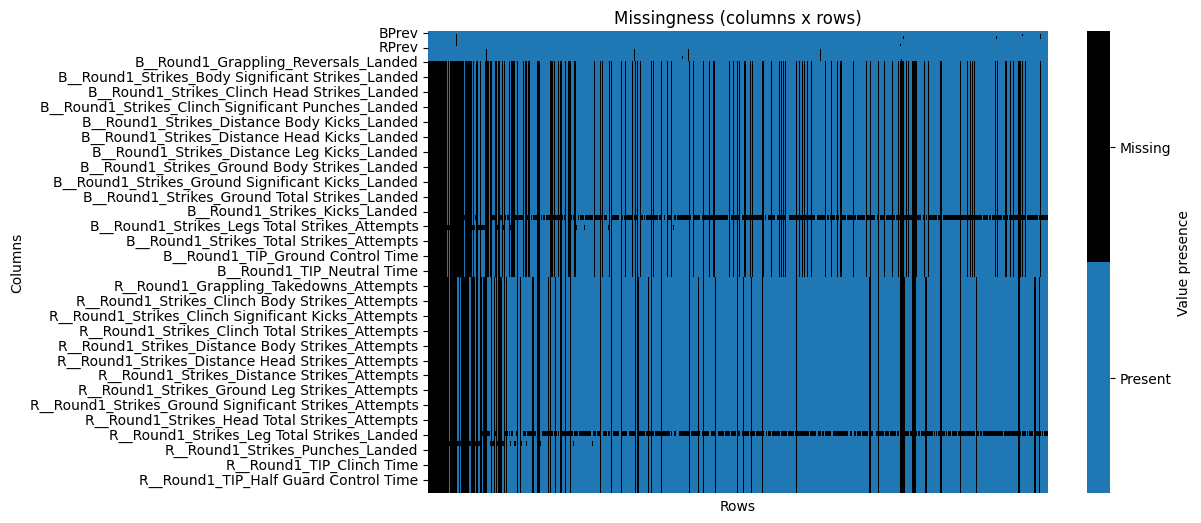

In [ ]:
def missing_overview(df, top=20, show_heatmap=True):
    n = len(df)
    miss = df.isna().sum().sort_values(ascending=False)
    summary = pd.DataFrame({
        "missing_count": miss,
        "missing_pct": (miss / n * 100).round(2)
    })
    display(summary.head(top))
    print(f"Cols w/ missing: {(summary['missing_count']>0).sum()}  |  Rows w/ any missing: {df.isna().any(axis=1).sum()}")
    display(pd.DataFrame({"top_rows_missing": df.isna().sum(axis=1).nlargest(5)}))
    if show_heatmap:
        from matplotlib.colors import ListedColormap
        # 0 -> blue (present), 1 -> black (missing)
        cmap = ListedColormap("#1f77b4", "#000000"])
        mat = df.isna().T.astype(int)  # convert to 0/1 for discrete colors
        plt.figure(figsize=(10, min(6, 0.18*df.shape[1])))
        ax = sns.heatmap(mat, cmap=cmap, cbar=True, xticklabels=False)
        cbar = ax.collections[0].colorbar
        # place ticks in the middle of the two discrete colors and label them
        cbar.set_ticks([0.25, 0.75])
        cbar.set_ticklabels(["Present", "Missing"])
        cbar.set_label("Value presence")
        plt.title("Missingness (columns x rows)"); plt.xlabel("Rows"); plt.ylabel("Columns")
        plt.show()
    return summary

missing_summary = missing_overview(df_filter, top=20)
# ...existing code...

In [ ]:
# we can see that especially total columns have a lot of missing values -> remove them
df_filter = df_filter[[col for col in df_filter.columns if "total" not in col.lower()]]

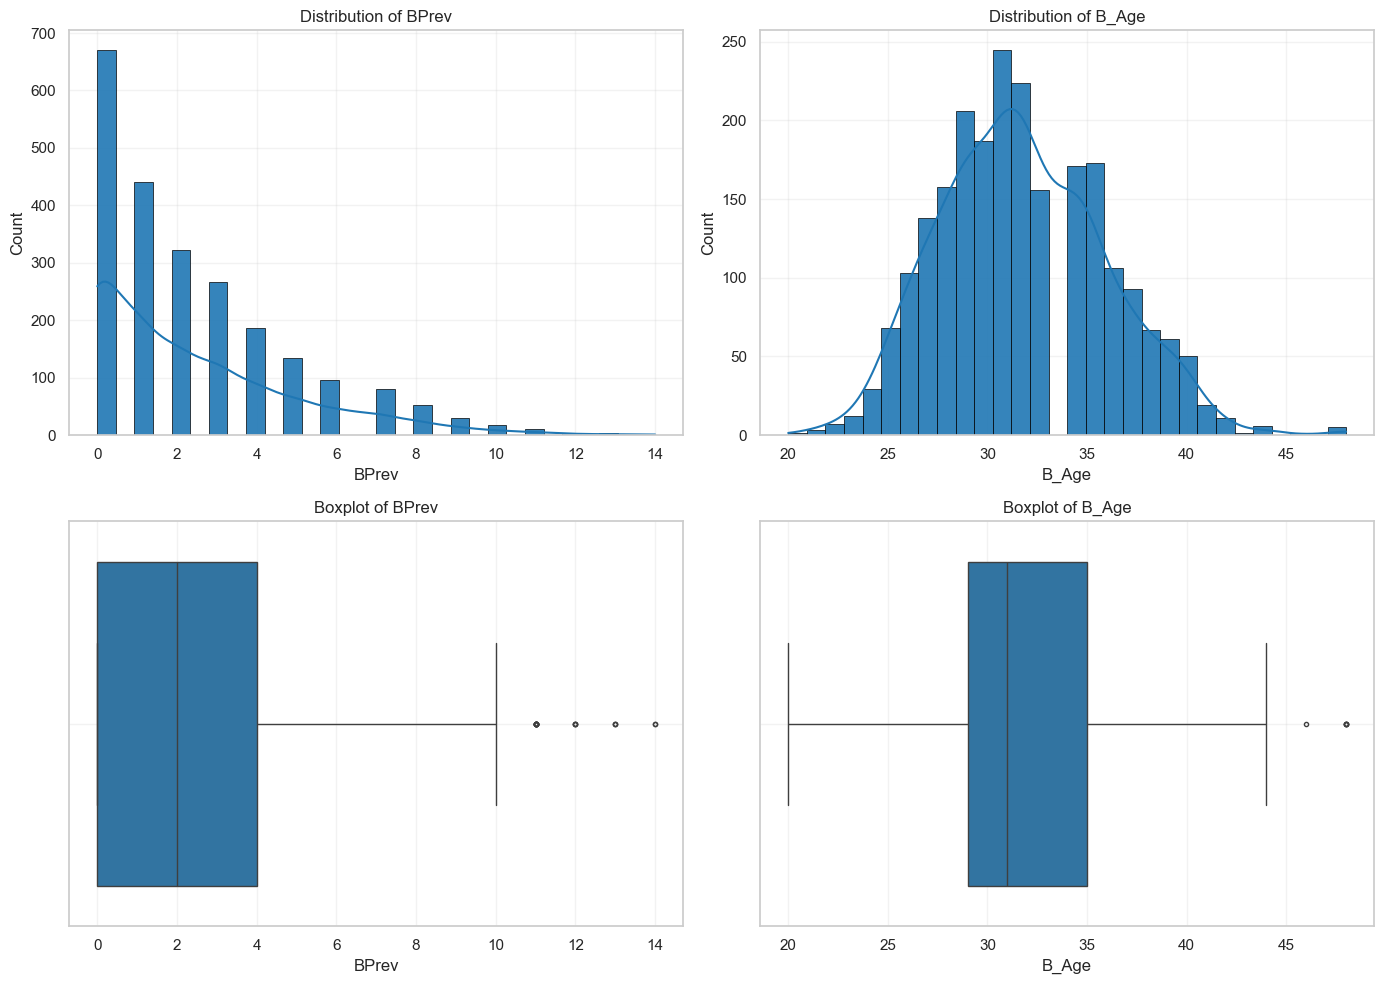

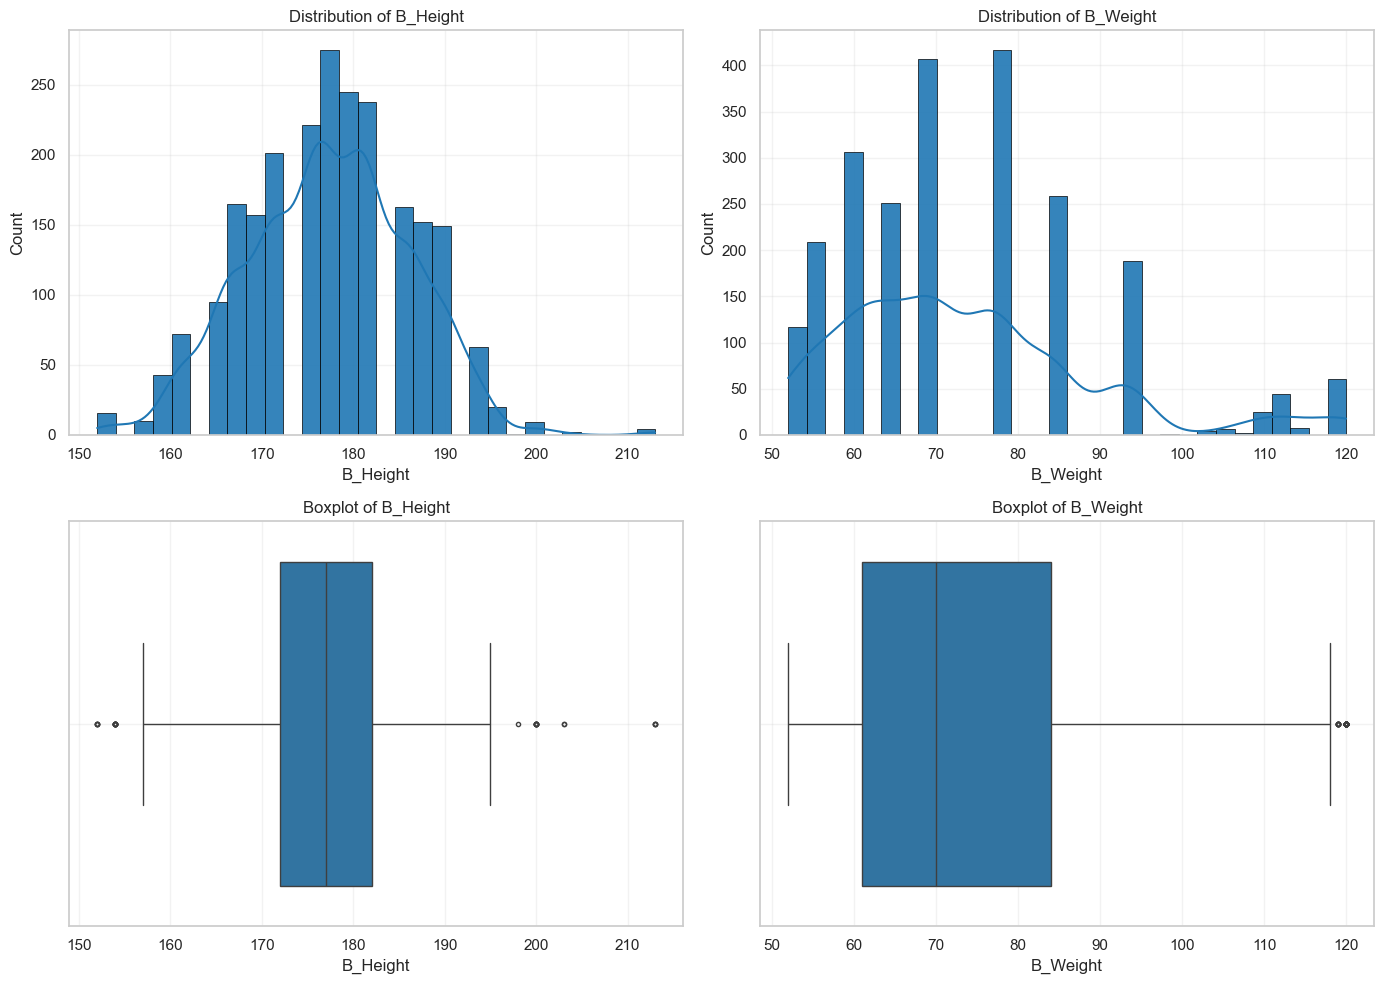

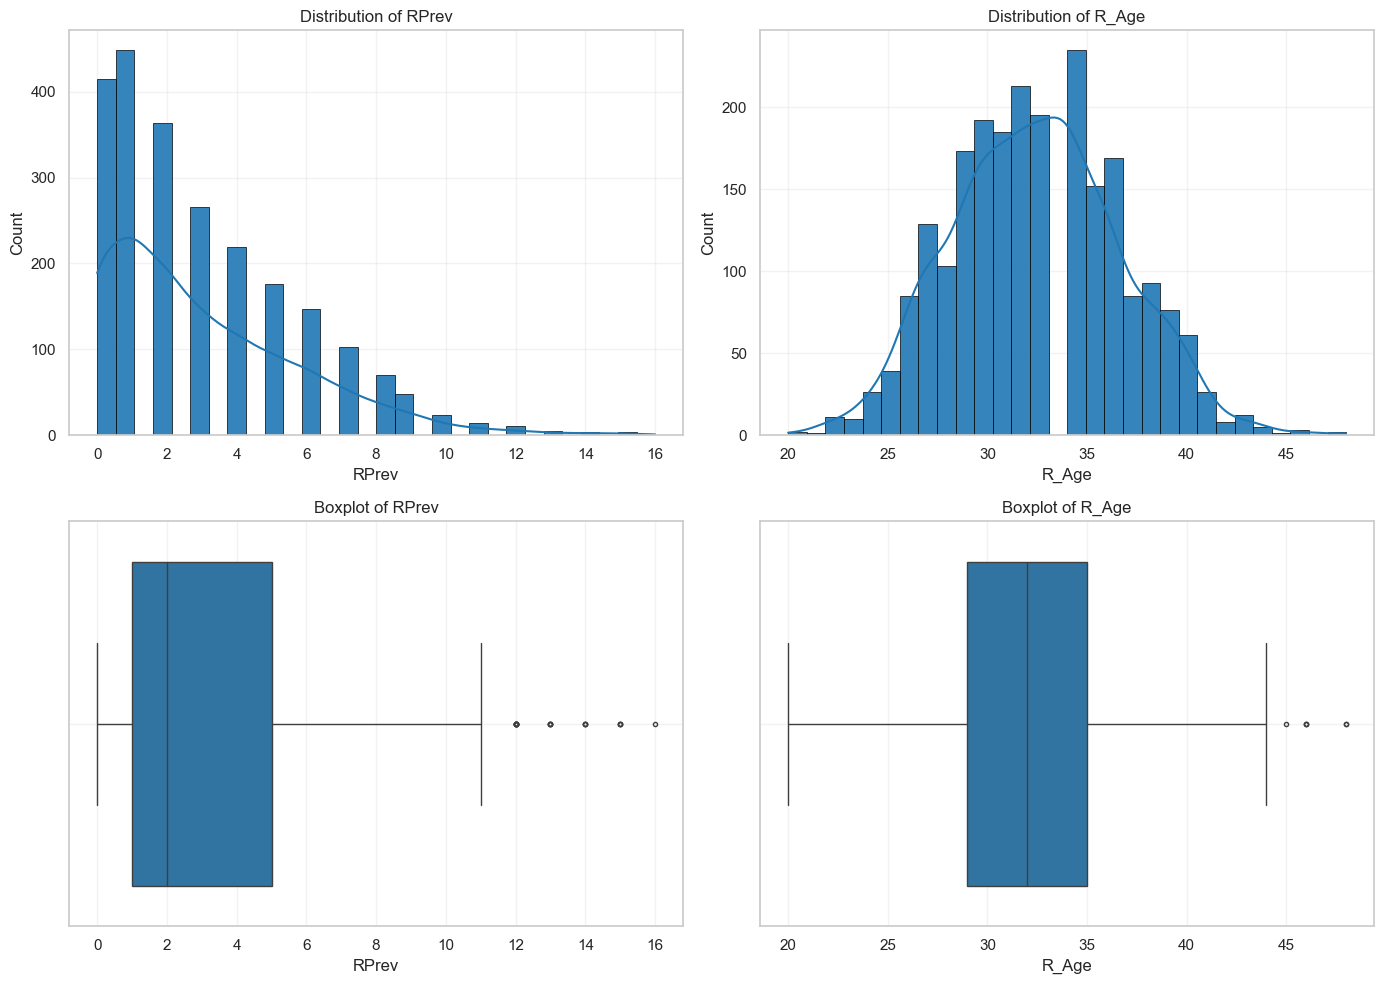

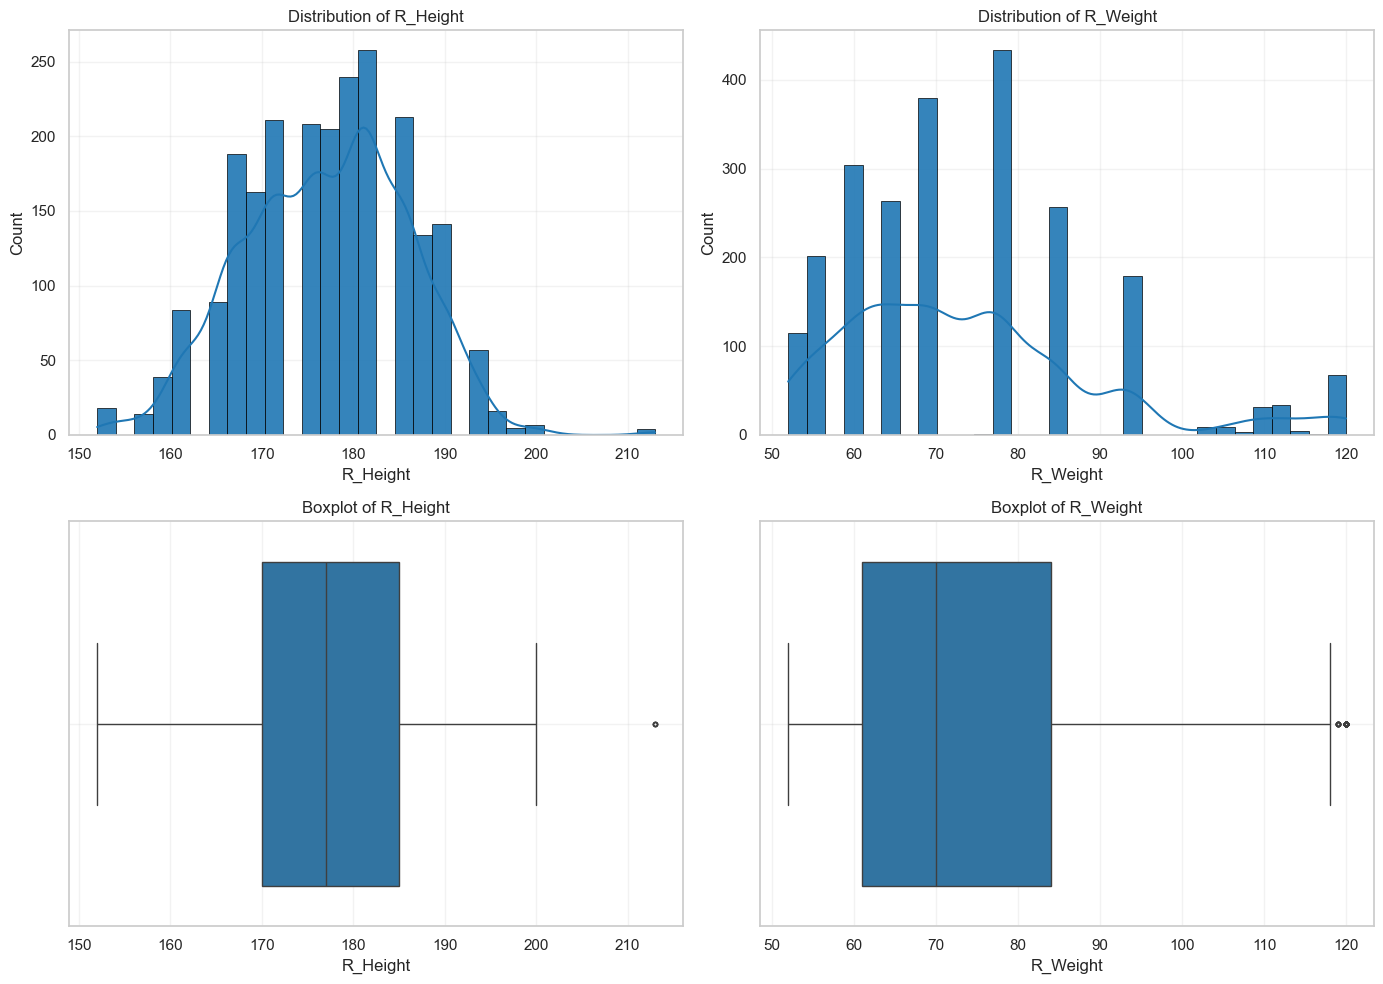

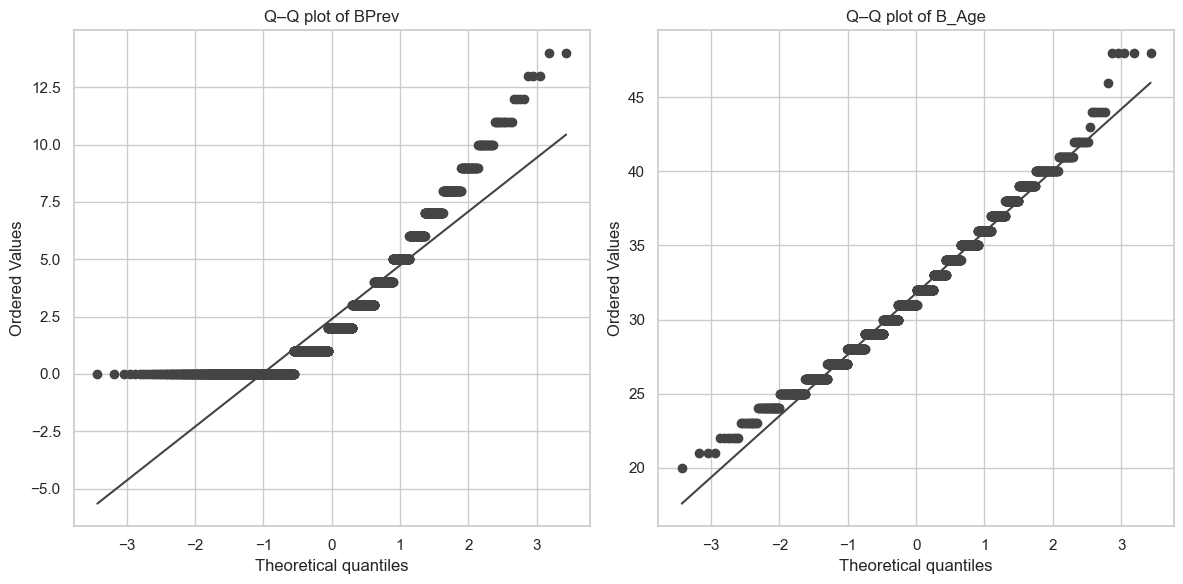

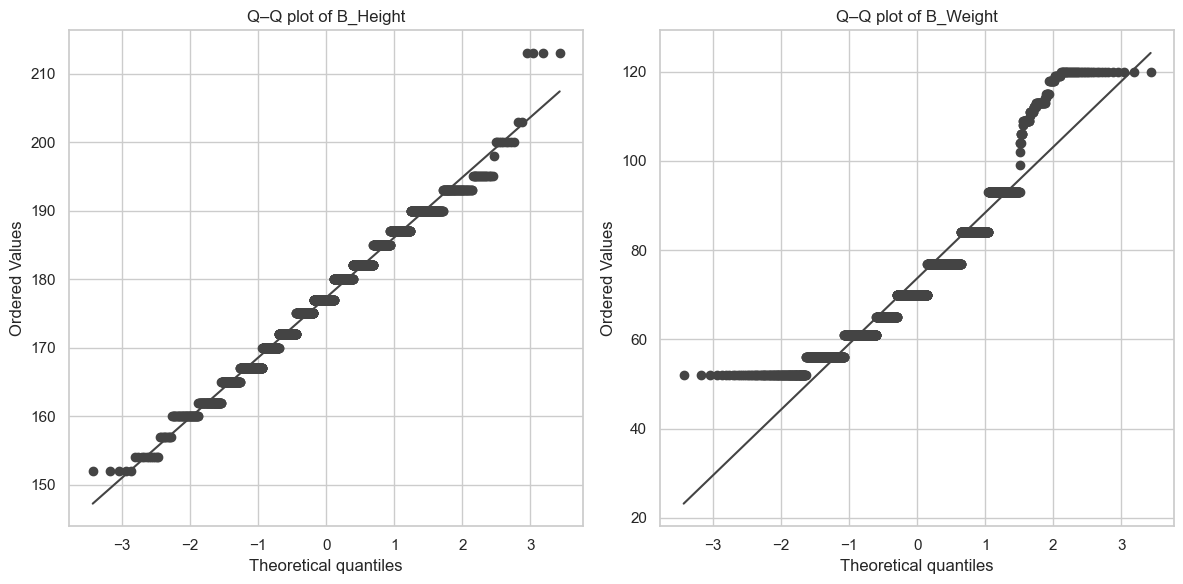

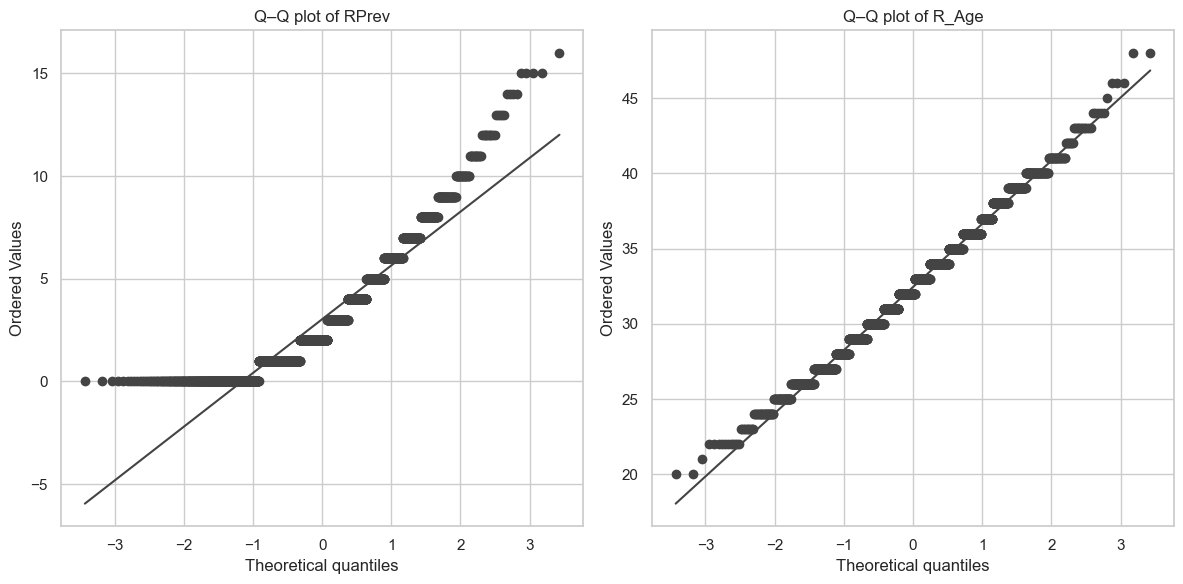

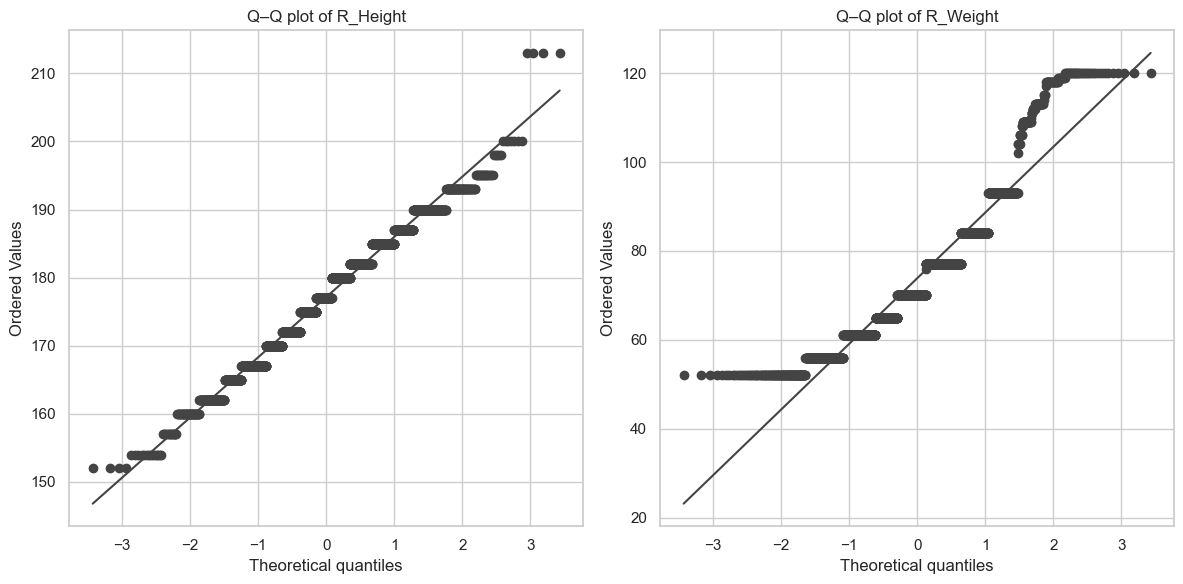

In [22]:
# ...existing code...
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# use same dark blue as in missing_overview
dark_blue = "#1f77b4"
sns.set_theme(style="whitegrid")

# Numeric variables
numeric_vars = ["BPrev", "B_Age", "B_Height", "B_Weight",
                "RPrev", "R_Age", "R_Height", "R_Weight"]

# Loop through variables in pairs (histogram + boxplot)
for i in range(0, len(numeric_vars), 2):
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))  # 2 rows (hist+box), 2 cols (two variables)

    for j, var in enumerate(numeric_vars[i:i+2]):
        # Histogram using dark blue
        sns.histplot(df[var], kde=True, bins=30, ax=axes[0, j],
                     color=dark_blue, alpha=0.9, edgecolor="black", linewidth=0.5)
        axes[0, j].set_title(f"Distribution of {var}")
        axes[0, j].grid(alpha=0.25)

        # Boxplot using dark blue
        sns.boxplot(x=df[var], ax=axes[1, j], color=dark_blue, fliersize=3)
        axes[1, j].set_title(f"Boxplot of {var}")
        axes[1, j].grid(alpha=0.25)

    plt.tight_layout()
    plt.show()

# Plot Q-Q plots in pairs (keep neutral colors for clarity)
for i in range(0, len(numeric_vars), 2):
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))

    for j, var in enumerate(numeric_vars[i:i+2]):
        stats.probplot(df[var].dropna(), dist="norm", plot=axes[j])
        # set Q-Q plot line/marker to neutral gray for readability
        for line in axes[j].get_lines():
            line.set_color("#444444")
            line.set_markeredgecolor("#444444")
        axes[j].set_title(f"Q–Q plot of {var}")

    plt.tight_layout()
    plt.show()
# ...existing code...

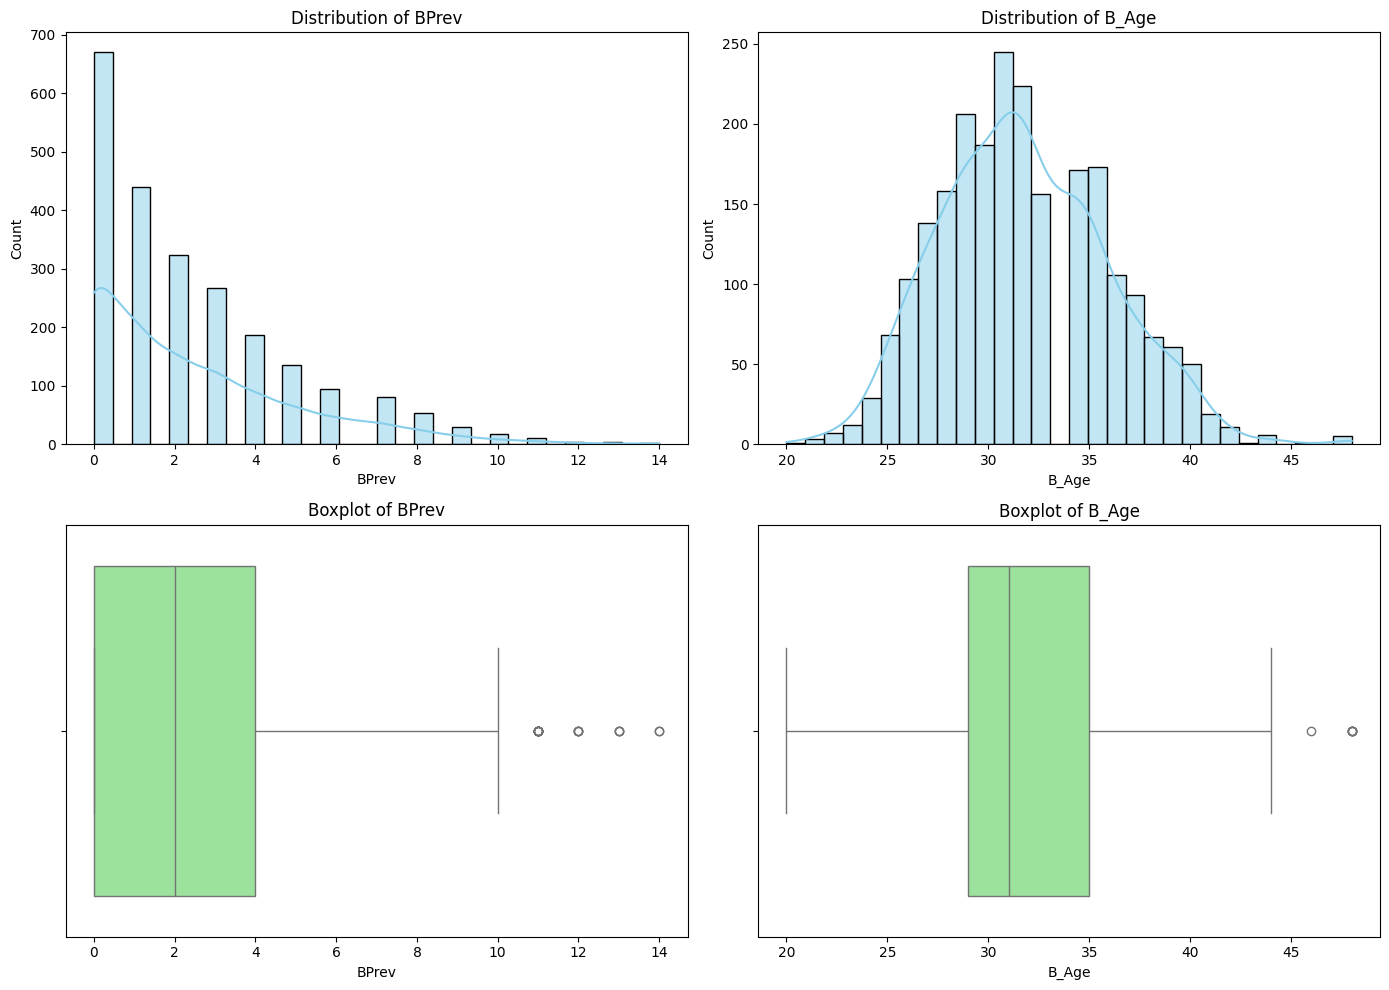

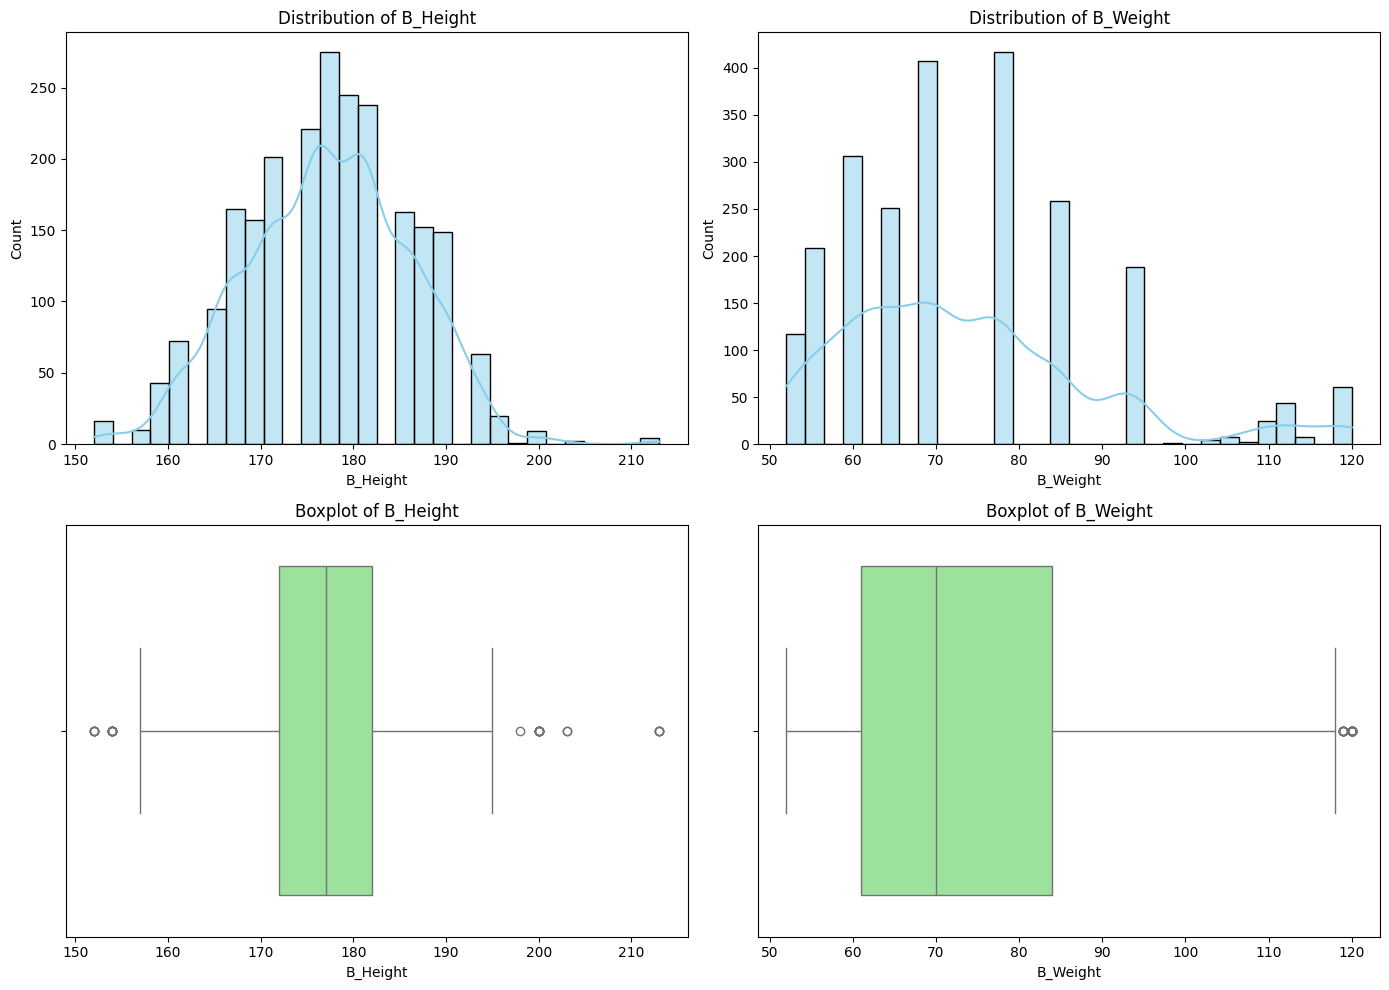

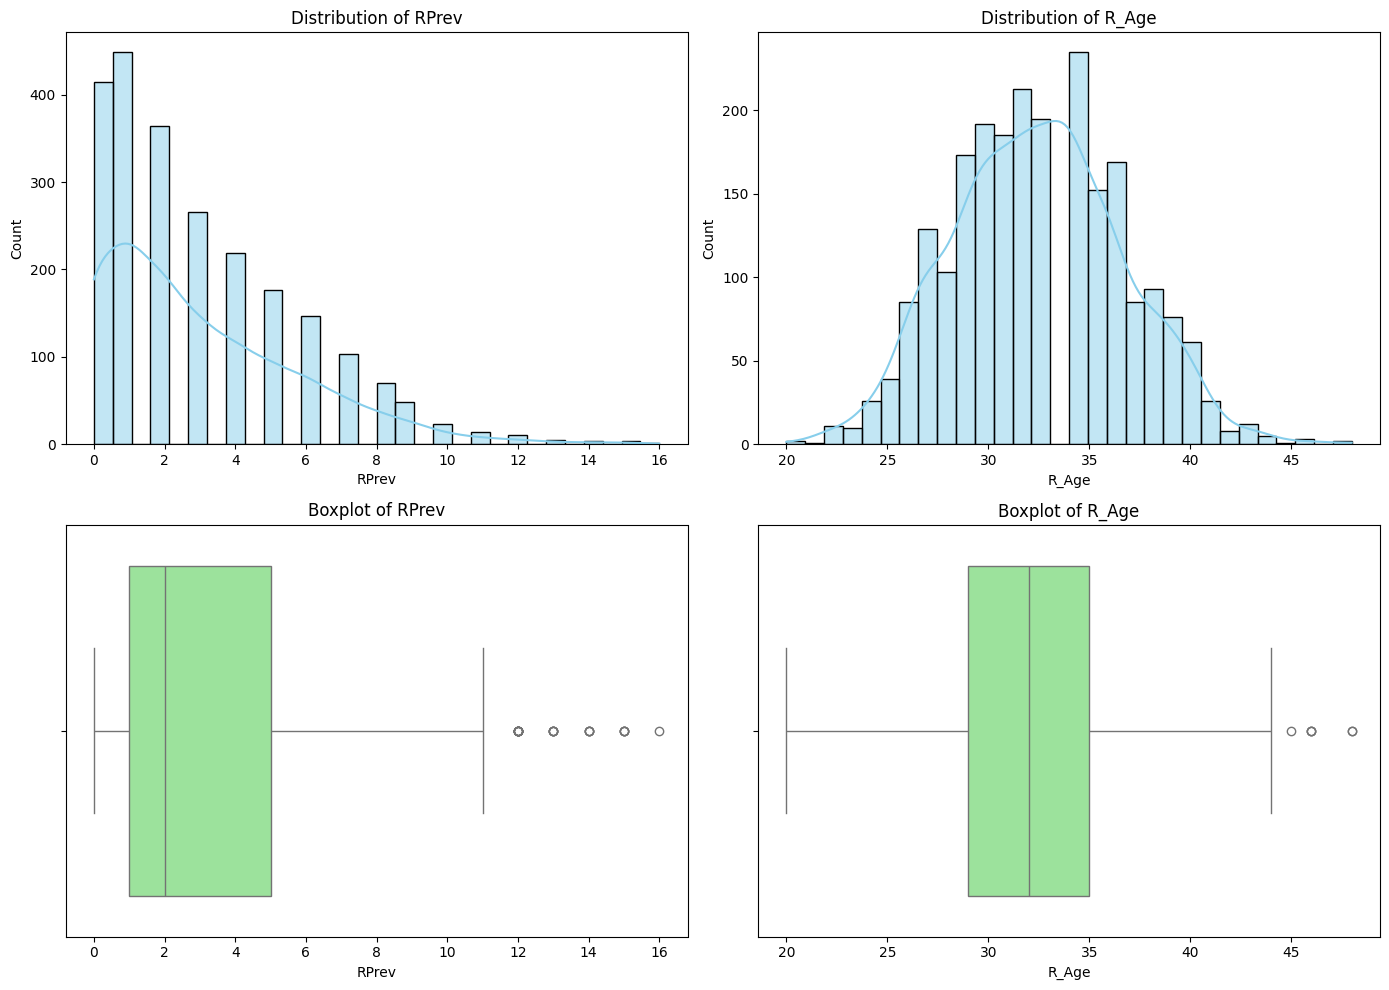

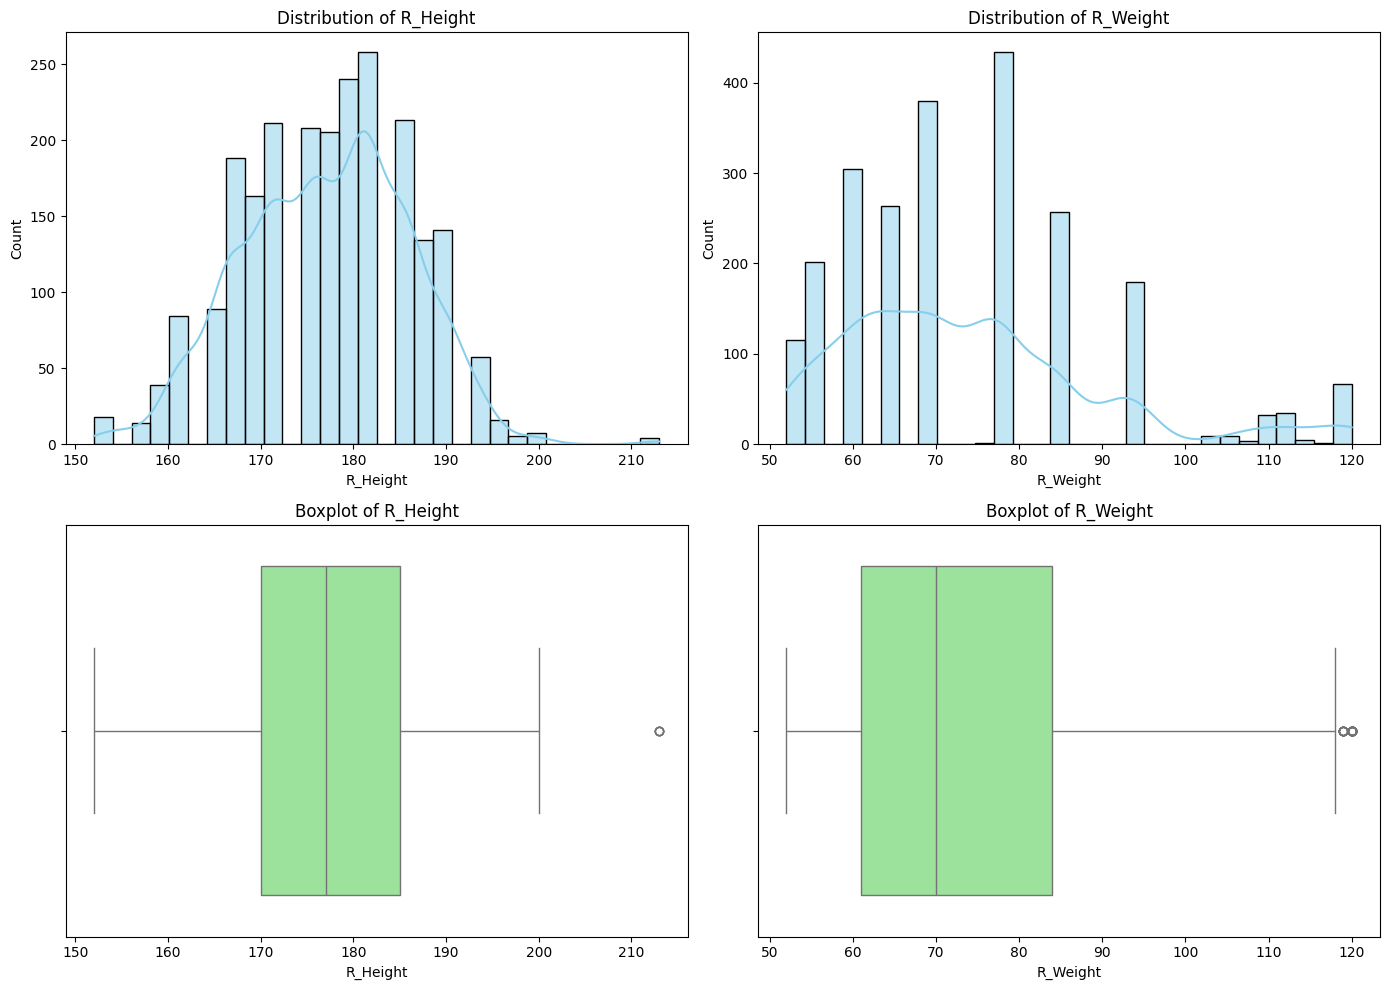

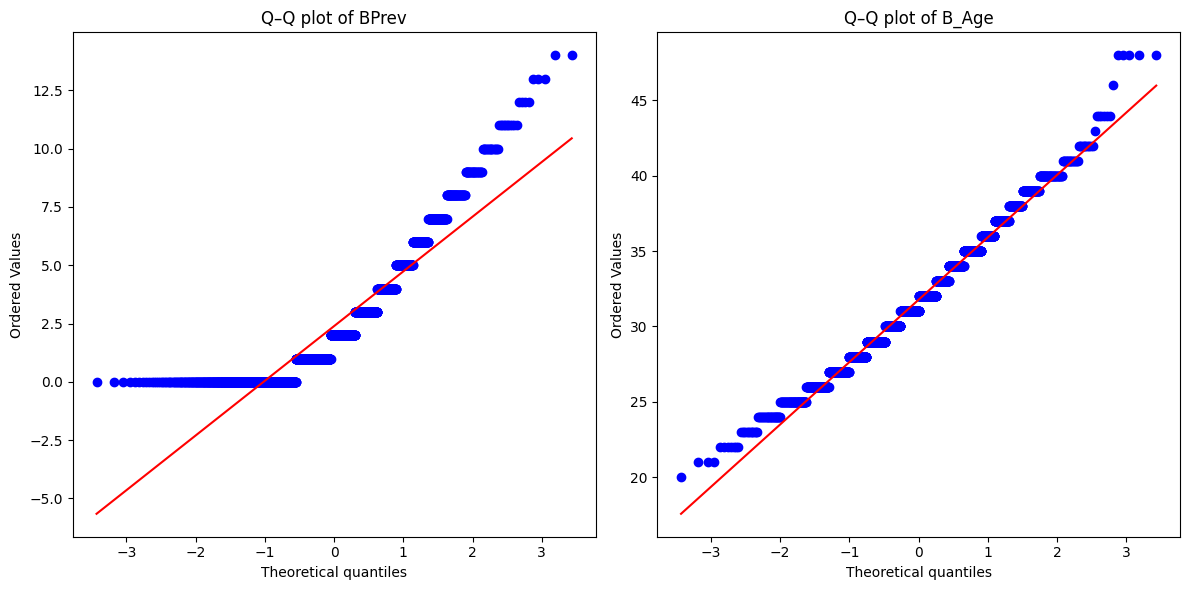

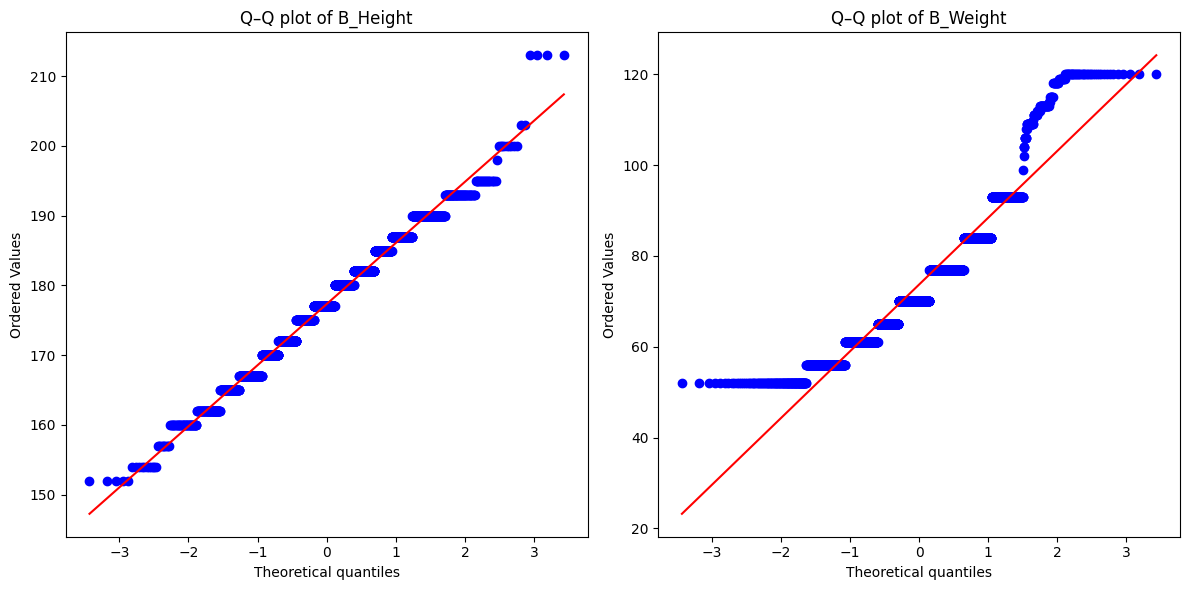

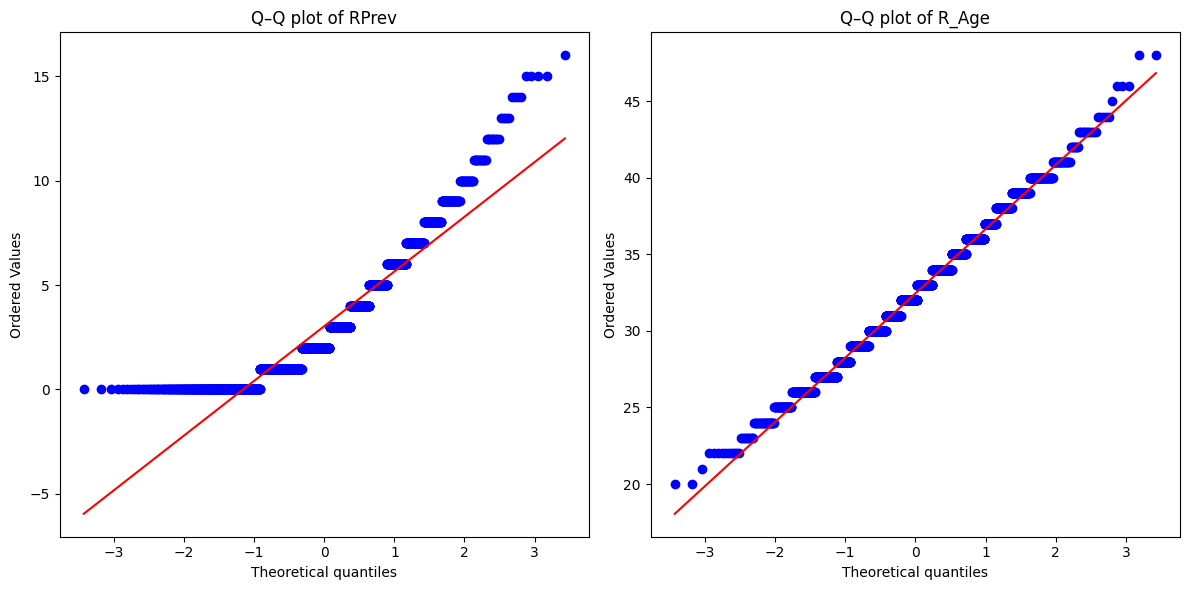

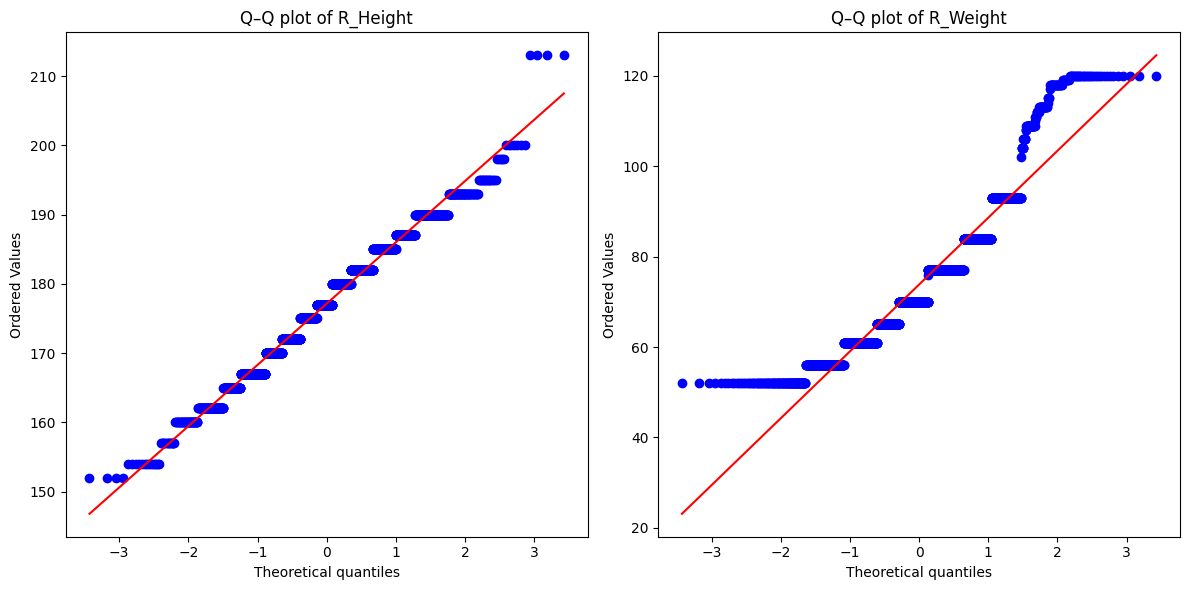

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
# Numeric variables
numeric_vars = ["BPrev", "B_Age", "B_Height", "B_Weight",
                "RPrev", "R_Age", "R_Height", "R_Weight"]

# Loop through variables in pairs
for i in range(0, len(numeric_vars), 2):
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))  # 2 rows (hist+box), 2 cols (two variables)

    for j, var in enumerate(numeric_vars[i:i+2]):
        # Histogram
        sns.histplot(df[var], kde=True, bins=30, ax=axes[0, j], color="skyblue")
        axes[0, j].set_title(f"Distribution of {var}")

        # Boxplot
        sns.boxplot(x=df[var], ax=axes[1, j], color="lightgreen")
        axes[1, j].set_title(f"Boxplot of {var}")

    plt.tight_layout()
    plt.show()

numeric_vars = ["BPrev", "B_Age", "B_Height", "B_Weight",
                "RPrev", "R_Age", "R_Height", "R_Weight"]

# Plot Q-Q plots in pairs
for i in range(0, len(numeric_vars), 2):
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))
    
    for j, var in enumerate(numeric_vars[i:i+2]):
        stats.probplot(df[var].dropna(), dist="norm", plot=axes[j])
        axes[j].set_title(f"Q–Q plot of {var}")
    
    plt.tight_layout()
    plt.show()


In [ ]:
categorical_vars = ["B_Location", "B_HomeTown", "R_Location", "R_HomeTown"]

# Make pairs of two
for i in range(0, len(categorical_vars), 2):
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))  # 1 row, 2 columns
    
    for j, var in enumerate(categorical_vars[i:i+2]):
        top10 = df[var].value_counts().nlargest(10)

        sns.barplot(y=top10.index, x=top10.values, ax=axes[j], palette="viridis")
        axes[j].set_title(f"Top 10 {var}")
        axes[j].set_xlabel("Count")
        axes[j].set_ylabel(var)
    
    plt.tight_layout()
    plt.show()